### File to analyze the self created dataset

In [6]:
from src.data.dataloader import VesselCaptureDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data_dir = "data/processed"
dataset = VesselCaptureDataset(data_dir)

In [8]:
print("Number of samples:", len(dataset))

Number of samples: 5573


In [9]:
data_loader = DataLoader(dataset, batch_size=1, shuffle=True)

Average vessel volume: 399.11
Average liquid volume: 183.53


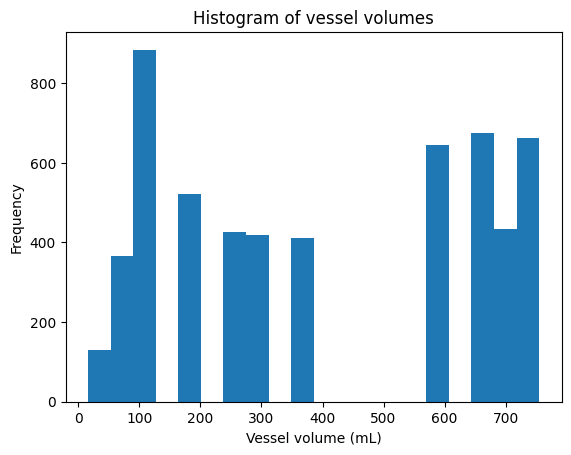

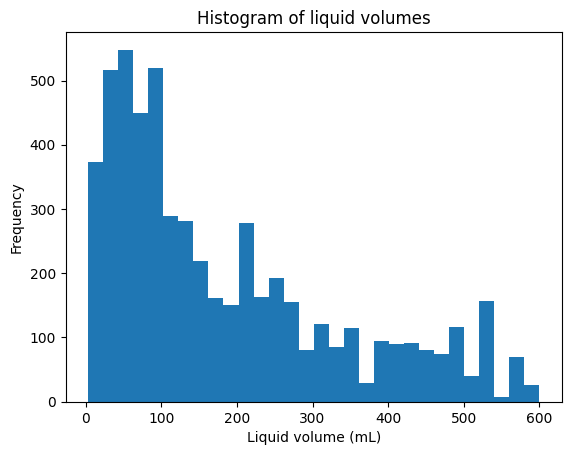

In [10]:
# get average of all vessel volumes
vessel_vol_sum = 0
liquid_vol_sum = 0
vessel_vol_list = []
liquid_vol_list = []

for i, data in enumerate(data_loader):
    vessel_vol = data["vol_vessel"]
    # store value for each sample for histogram
    vessel_vol_list.append(vessel_vol.item())
    vessel_vol_sum += vessel_vol.item()
    liquid_vol = data["vol_liquid"]
    # store value for each sample for histogram
    liquid_vol_list.append(liquid_vol.item())
    liquid_vol_sum += liquid_vol.item()

vessel_vol_avg = vessel_vol_sum/len(dataset)
liquid_vol_avg = liquid_vol_sum/len(dataset)

# print results with 2 decimal places
print("Average vessel volume:", "{:.2f}".format(vessel_vol_avg))
print("Average liquid volume:", "{:.2f}".format(liquid_vol_avg))

# plot histogram of vessel volumes
plt.hist(vessel_vol_list, bins=20)
plt.title("Histogram of vessel volumes")
plt.xlabel("Vessel volume (mL)")
plt.ylabel("Frequency")
plt.show()

# plot histogram of liquid volumes
plt.hist(liquid_vol_list, bins=30)
plt.title("Histogram of liquid volumes")
plt.xlabel("Liquid volume (mL)")
plt.ylabel("Frequency")
plt.show()

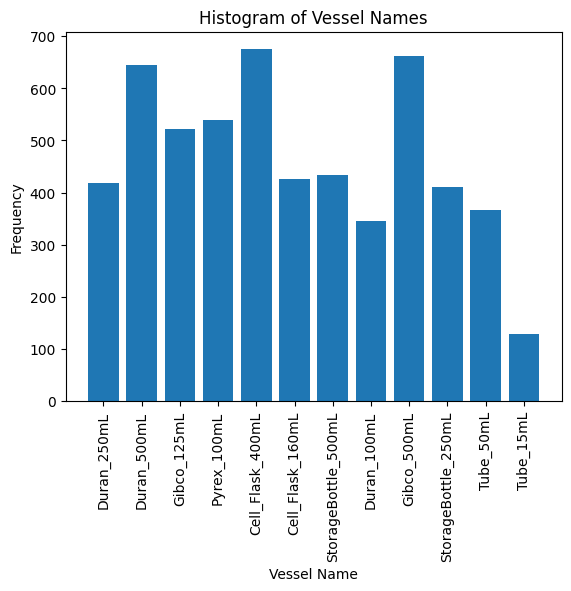

In [11]:
from collections import Counter

vessel_names = []
for i, data in enumerate(data_loader):
    vessel_name = data["vessel_name"]
    vessel_names.append(str(vessel_name))
    #print(vessel_names)

# Count the occurrences of each vessel name
name_counts = Counter(vessel_names)

# Extract unique vessel names and their counts
unique_vessel_names = [name[2:-2] for name in name_counts.keys()]  # Remove brackets and quotes
vessel_name_counts = list(name_counts.values())

# Plot histogram of vessel names
# bar without brackets for names

plt.bar(unique_vessel_names, vessel_name_counts)
plt.title("Histogram of Vessel Names")
plt.xlabel("Vessel Name")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [12]:
vessel_depth_path = "data/processed/StorageBottle_250mL_156mL_1105_3948/Input_EmptyVessel_Depth_segmented.npy"
vessel_depth = np.load(vessel_depth_path).astype(np.float32)

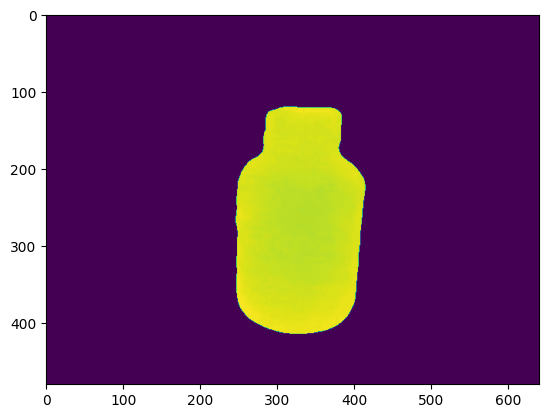

In [13]:
# visualize vessel depth image
plt.imshow(vessel_depth)

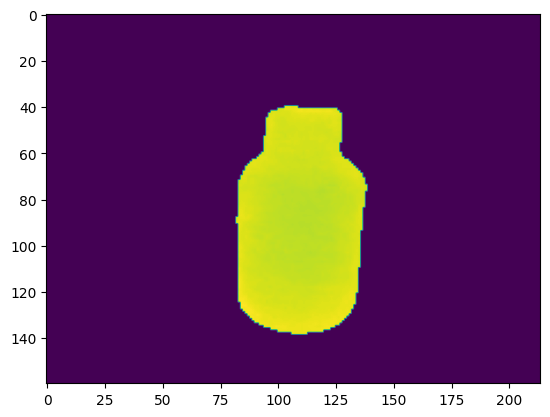

In [14]:
# resize vessel depth image
vessel_depth = vessel_depth[::3, ::3]

# visualize resized vessel depth image
plt.imshow(vessel_depth)

In [19]:
# find mean of all vessel depth images in the dataset
vessel_depth_sum = 0

for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_sum += vessel_depth.sum()/vessel_depth.numel()

vessel_depth_avg = vessel_depth_sum/len(dataset)

# calculate std of all vessel depth images in the dataset
vessel_depth_std_sum = 0
for i, data in enumerate(data_loader):
    vessel_depth = data["vessel_depth"]
    vessel_depth_std_sum += (vessel_depth - vessel_depth_avg)**2

vessel_depth_std = (vessel_depth_std_sum/len(dataset))**0.5


# print results with 2 decimal places
print("Average vessel depth:", "{:.2f}".format(vessel_depth_avg))
print("Std of vessel depth:", "{:.2f}".format(vessel_depth_std))

Average vessel depth: 0.12


TypeError: unsupported format string passed to Tensor.__format__

In [17]:
# same for liquid depth
liquid_depth_sum = 0
for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_sum += liquid_depth.sum()/liquid_depth.numel()

liquid_depth_avg = liquid_depth_sum/len(dataset)

# print results with 2 decimal places
print("Average liquid depth:", "{:.2f}".format(liquid_depth_avg))

Average liquid depth: 0.20


In [20]:
# calculate mean and std of all liquid depth images in the dataset
liquid_depth_std_sum = 0
for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_std_sum += (liquid_depth - liquid_depth_avg)**2
    print("Liquid depth std sum:", liquid_depth_std_sum)

liquid_depth_std = (liquid_depth_std_sum/len(dataset))**0.5


Liquid depth std sum: tensor([[[0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382],
         [0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382],
         [0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382],
         ...,
         [0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382],
         [0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382],
         [0.0382, 0.0382, 0.0382,  ..., 0.0382, 0.0382, 0.0382]]])
Liquid depth std sum: tensor([[[0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765],
         [0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765],
         [0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765],
         ...,
         [0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765],
         [0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765],
         [0.0765, 0.0765, 0.0765,  ..., 0.0765, 0.0765, 0.0765]]])
Liquid depth std sum: tensor([[[0.1147, 0.1147, 0.1147,  ..., 0.1147, 0.1147, 0.1147],
         [0.1147, 0.1147, 0.1147,  ..., 0.1147, 0.1147, 0

In [21]:
import numpy as np

liquid_depth_sum = 0
liquid_depth_squares_sum = 0  # Sum of squared liquid depths

for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_sum += liquid_depth.sum()
    liquid_depth_squares_sum += np.sum(liquid_depth**2)

liquid_depth_avg = liquid_depth_sum / len(dataset)
liquid_depth_std = np.sqrt((liquid_depth_squares_sum / len(dataset)) - (liquid_depth_avg**2))

print("Average liquid depth:", "{:.2f}".format(liquid_depth_avg))
print("Standard deviation of liquid depth:", "{:.2f}".format(liquid_depth_std))


TypeError: sum() received an invalid combination of arguments - got (axis=NoneType, out=NoneType, ), but expected one of:
 * (*, torch.dtype dtype)
      didn't match because some of the keywords were incorrect: axis, out
 * (tuple of ints dim, bool keepdim, *, torch.dtype dtype)
 * (tuple of names dim, bool keepdim, *, torch.dtype dtype)


In [24]:
import torch

liquid_depth_sum = 0
liquid_depth_squares_sum = 0  # Sum of squared liquid depths

for i, data in enumerate(data_loader):
    liquid_depth = data["liquid_depth"]
    liquid_depth_sum += liquid_depth.sum().item()
    liquid_depth_squares_sum += torch.sum(liquid_depth**2).item()

liquid_depth_avg = liquid_depth_sum / len(dataset)
liquid_depth_std = (liquid_depth_squares_sum / len(dataset)) - (liquid_depth_avg**2)
print(liquid_depth_std)
liquid_depth_std = np.sqrt(liquid_depth_std).item()

print("Average liquid depth:", "{:.2f}".format(liquid_depth_avg))
print("Standard deviation of liquid depth:", "{:.2f}".format(liquid_depth_std))


-44794652.402387165
Average liquid depth: 6694.48
Standard deviation of liquid depth: nan


C:\Users\apo_n\AppData\Local\Temp\ipykernel_26936\92328394.py:14: RuntimeWarning: invalid value encountered in sqrt
  liquid_depth_std = np.sqrt(liquid_depth_std).item()
